![](0.jpg)

# TSF Task 3:- To explore Unsupervised Machine Learning

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Data Preprocessing:-**

In [3]:
#renaming the columns to ease further operations
df.columns=['Sepal_length','Sepal_width','Petal_length','Petal_width']

In [4]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Checking the missing values
df.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
dtype: int64

So no Null values are there in the data set.

**Exploratory Data Analysis:-**

In [6]:
#get the shape of the dataset
df.shape

(150, 4)

In [7]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
#Description of the Dataset
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#checking correlation between columns
df.corr(method='pearson')

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.117570,0.871754,0.817941
Sepal_width,-0.117570,1.000000,-0.428440,-0.366126
Petal_length,0.871754,-0.428440,1.000000,0.962865
Petal_width,0.817941,-0.366126,0.962865,1.000000


**Visualise the relation between features:-**

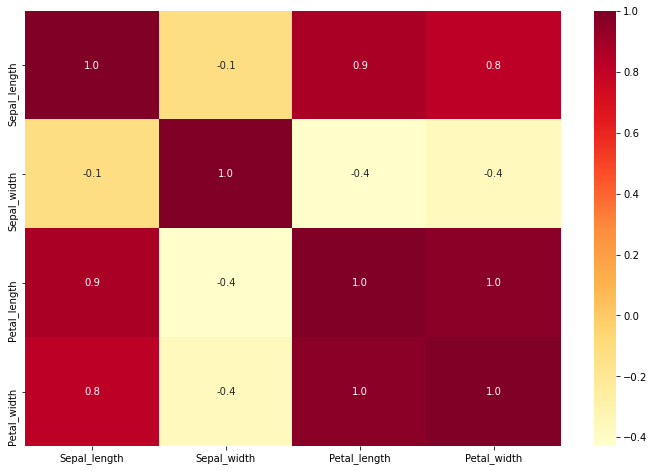

In [10]:
#Checking correlation between columns visually
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="YlOrRd")

From the heatmap it's pretty edident that correlation between maximum features come out to be high. 
Such high correlations between Sepal_length & Petal_length; Sepal_length & Petal_width are interesting.

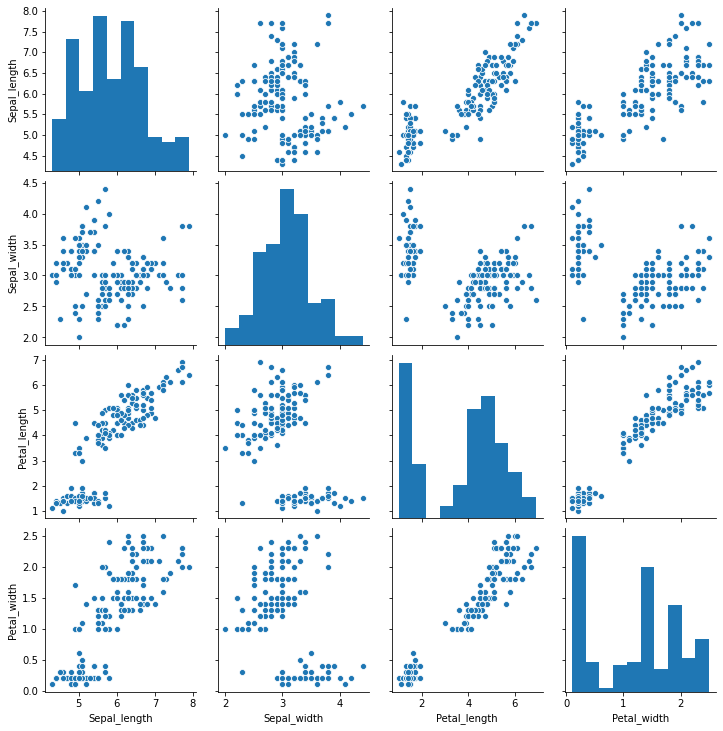

In [11]:
sns.pairplot(df)

From the pair plot above, we can only be confirmed about the linear relationship between the Petal_length and the Petal_width. Otherwise all the relations are not yet confirmed.

# Finding the optimum number of clusters using K-Means:-

**Elbow Method-**

Text(0.5, 1.0, 'Elbow Method Visualisation')

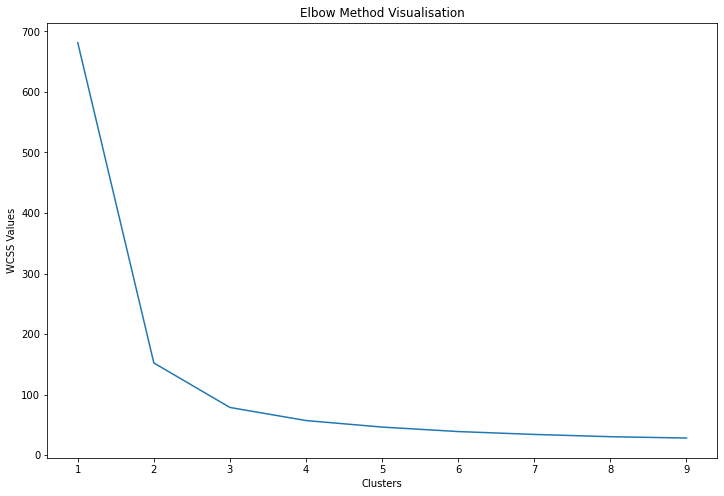

In [12]:
from sklearn.cluster import KMeans
wcss=[]
K_rng=10

for i in range(1,K_rng):
    K=KMeans(i)
    K.fit(df)
    w=K.inertia_
    wcss.append(w)
    
Clusters=range(1,K_rng)
plt.figure(figsize=(12,8))
plt.plot(Clusters,wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS Values') #Within Cluster Sum of Squares
plt.title('Elbow Method Visualisation')

Looking at the curve above, we can say that the 'ELBOW' is around 2 or 3 clusters. Hence will consider K=2 and K=3!

# For K = 2

In [13]:
#Fitting the model
K2= KMeans(2)
K2.fit(df)

KMeans(n_clusters=2)

In [14]:
#Prediction using the model
iris_pred=df.copy()
iris_pred['Predicted']=K2.fit_predict(df)

Text(0.5, 1.0, 'Sepal_length vs Sepal_width(K=2)')

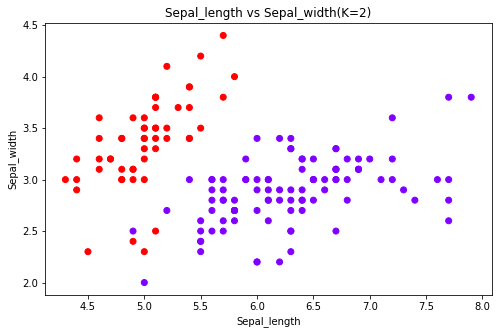

In [23]:
#Visualise the clusters (Sepal features) after prediction
plt.figure(figsize=(8,5))
plt.scatter(iris_pred['Sepal_length'], iris_pred['Sepal_width'], c=iris_pred['Predicted'], cmap = 'rainbow')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_length vs Sepal_width(K=2)')

Text(0.5, 1.0, 'Petal_length vs Petal_width(K=2)')

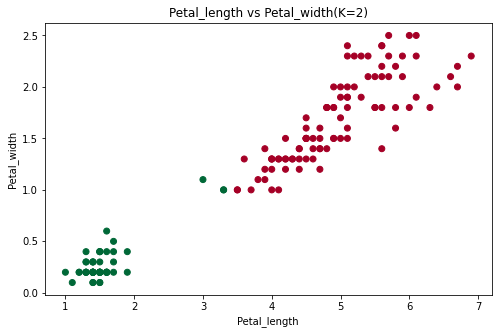

In [27]:
#Visualise the clusters (Petal features) after prediction
plt.figure(figsize=(,5))
plt.scatter(iris_pred['Petal_length'], iris_pred['Petal_width'], c=iris_pred['Predicted'], cmap = 'RdYlGn')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.title('Petal_length vs Petal_width(K=2)')

# For K=3

In [28]:
#Fitting the model
K3= KMeans(3)
K3.fit(df)

KMeans(n_clusters=3)

In [29]:
#Prediction using the model
iris_pred2=df.copy()
iris_pred2['Predicted']=K3.fit_predict(df)

Text(0.5, 1.0, 'Sepal_length vs Sepal_width(K=3)')

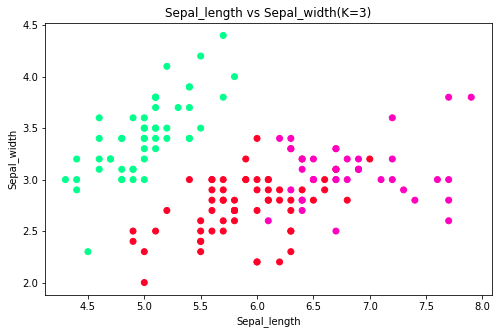

In [34]:
#Visualise the clusters (Sepal features) after prediction
plt.figure(figsize=(8,5))
plt.scatter(iris_pred2['Sepal_length'], iris_pred2['Sepal_width'], c=iris_pred2['Predicted'], cmap = 'gist_rainbow')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_length vs Sepal_width(K=3)')

Text(0.5, 1.0, 'Petal_length vs Petal_width(K=3)')

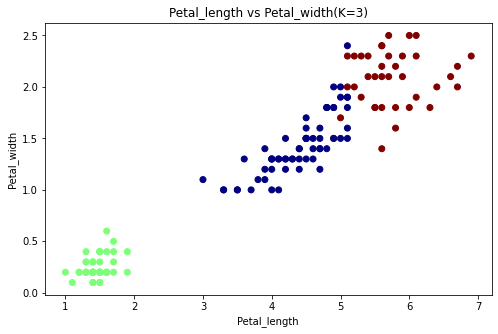

In [35]:
#Visualise the clusters (Petal features) after prediction
plt.figure(figsize=(8,5))
plt.scatter(iris_pred2['Petal_length'], iris_pred2['Petal_width'], c=iris_pred2['Predicted'], cmap = 'jet')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.title('Petal_length vs Petal_width(K=3)')

**After considering the values of K=2 or 3; we can conclude from above visualisations that 3 is the optimum value of K in this Iris dataset. It can also be said that Petal features are better to recognise the clusters than the Sepal features.**

# END